- 빨간 점(원래 데이터)와 파란 선(선형 방정식)이 비슷한 궤도에 있어야 연관성 있는 거...
- R_swuared(R^2): 모형이 얼마나 설명력을 갖는지?
    - 값이 A면 y의 분산을 A%만큼 설명한다. 높을수록 좋음
- F검정과 유의확률(p value): 모형이 통계적으로 유의미한지?
    - 작으면 유의미
- 회귀계수의 t값과 유의확률(p value): 회귀계수가 유의미한지?
    - 작으면 유의미


- [참고: 친절한 데이터 사이언티스트 되기 강좌: 회귀분석 결과의 해석과 R^2의 의미...](https://recipesds.tistory.com/entry/%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D-%EA%B2%B0%EA%B3%BC%EC%9D%98-%ED%95%B4%EC%84%9D%EA%B3%BC-R%C2%B2%EC%84%A4%EB%AA%85%EB%A0%A5%EC%9D%98-%EC%9D%98%EB%AF%B8-%EA%B7%B8%EB%A6%AC%EA%B3%A0-R%EC%9D%80-%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98%EC%9D%98-%EC%A0%9C%EA%B3%B1-%EC%9D%91)

In [1]:
# scikit learn 패키지에서 필요한 모델인 linear_model이라는 모듈을 불러들임
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# matplotlib에는 사전에 정의한 많은 스타일이 있다.
# ggplot도 그 중 하나임
# R에서 사용하는 ggplot을 흉내내는 스타일을 사용하겠다고 선언
matplotlib.style.use('ggplot')

In [40]:
# 2차원 배열을 만들어 'data'라는 변수에 할당
# (키-몸무게)
# data = {'x' : [150.0, 155, 160.0],
#        'y' : [50, 54, 60]} # 50, 20, 60 이러면 예측 어려움. 선형 방정식이 점과 비슷해야 좋은 거임
# (키-몸무게)
# data = {'x' : [156.5, 160.6, 169.5, 167.9, 154.8, 163.0],
#        'y' : [51.7, 54.8, 62.3, 61.3, 49.8, 55.8]}
# (토익점수, 10점만점 가정)
data = {'x' : [4,6,7,7,8,10],
        'y' : [2,4,6,8,7,9]}

<AxesSubplot:xlabel='x', ylabel='y'>

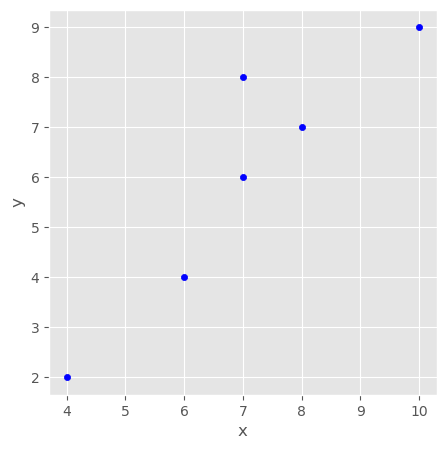

In [41]:
# data라는 변수의 값을 data frame 형태로 변환
data = pd.DataFrame(data)

data.plot(kind="scatter",  # 산점도를 그리시오
          x='x',           # 가로축은 x라고 라벨을 붙임
          y='y',           # 세로축은 y라고 라벨을 붙임
          figsize=(5,5),   # 가로 5인치, 세로 5인치 크기의 박스를 설정
          color="blue")    # 산점도 상의 점 색상을 파랑색으로 지정

In [42]:
# linear_model 모듈이 포함하고 있는 Linearregression() 함수를 'linear_regression'이라고 하는 변수에 할당
linear_regression = linear_model.LinearRegression()

# Linearregression()의 fit()이라는 함수를 이용하여 선형회귀 모델 훈련 실행
# x: 독립변수는 y: 종속변수
linear_regression.fit(X = pd.DataFrame(data["x"]), y = data["y"])

# 선형 그래프 만들어냄
# 선형 회귀식의 세로축 절편
print('a value = ', linear_regression.intercept_)
# 선형 회귀식의 기울기
print('b balue =', linear_regression.coef_)

a value =  -2.399999999999995
b balue = [1.2]


In [43]:
# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))
# 실제 y값과 예측한 y값을 비교하여 잔차(residuals)를 구한다.
print(prediction)
residuals = data["y"] - prediction;  
print(residuals)
# 변수의 갯수(6개), 잔차의 평균값, 잔차의 표준편차, 최소값, 25% 값, 50% 값, 75% 값, 최대값을 출력한다.
print(residuals.describe())
# 잔차를 제곱하여 전체를 합침. 결과값을 SSE라는 변수에 할당
SSE=sse= (residuals**2).sum()
print("SSE = ", SSE);  
# y값의 표준편차를 제곱한 것을 모두 합침. 그 결과값을 SST라는 변수에 할당
SST = ((data["y"]-data["y"].mean())**2).sum()
print("SST = ", SST)
# 결정계수 R을 구함
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)


# => [50, 58, 60]인데 [51. 56. 61.]로 예측함
# => 예측값과 실제 값 차이는 -1.0  2.0  -1.0

[2.4 4.8 6.  6.  7.2 9.6]
0   -0.4
1   -0.8
2    0.0
3    2.0
4   -0.2
5   -0.6
Name: y, dtype: float64
count    6.000000
mean     0.000000
std      1.019804
min     -0.800000
25%     -0.550000
50%     -0.300000
75%     -0.050000
max      2.000000
Name: y, dtype: float64
SSE =  5.2
SST =  34.0
R_squared =  0.8470588235294118


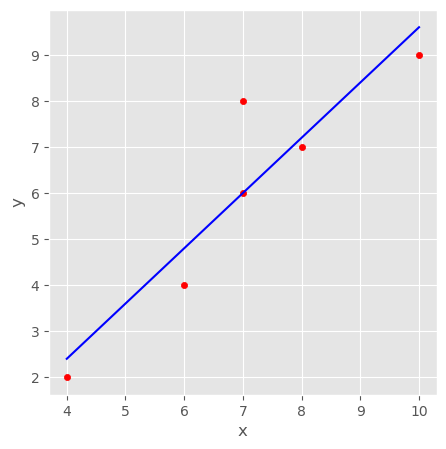

In [44]:
data.plot(kind="scatter",x="x",y="y",figsize=(5,5),color="red")
# Plot regression line
plt.plot(data["x"],prediction,color="blue")

# => 빨간 점: 실제값
# => 파란 선: 선형 방정식

In [45]:
# sklearn.metrics라는 패키지로부터 mean_squared_error 모듈을 불러들임
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [46]:
# 결정계수 R값을 구함
print('score = ', linear_regression.score(X = pd.DataFrame(data["x"]), y = data["y"]))
# 실제값(data[y])과 회귀식 값(prediction)의 차이의 제곱을 구함
print('Mean_absolute_Error = ', mean_absolute_error(prediction, data['y']))
print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))
print('r2_score = ', r2_score(prediction, data['y']))
# Mean squared error의 제곱근 값을 구함
print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  0.8470588235294118
Mean_absolute_Error =  0.6666666666666666
Mean_Squared_Error =  0.8666666666666667
r2_score =  0.8194444444444442
RMSE =  0.9309493362512627


In [47]:
import sklearn.metrics; dir(sklearn.metrics)
# 위에서 만들어진 선형회귀 모델을 적용하여 선형회귀 값을 구해본다.
# 그 값을 prediction에 할당한다.
mydata = {'x' : [165.0],
        'y' : []}
prediction = linear_regression.predict(X = pd.DataFrame(mydata["x"]))
print("165cm의 체중 예측=>", prediction)

165cm의 체중 예측=> [195.6]


/Users/min0/Downloads/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
